# Scipy (Python3) tutorial #

* official website : http://www.scipy.org/
* documentation : https://docs.scipy.org/doc/scipy/reference/
* Tutorial : https://docs.scipy.org/doc/scipy/reference/tutorial/index.html


## Packages ##

|Topic                                  |package name        |
|:--------------------------------------|:--------------------
|Special functions                      |scipy.special       |
|Integration                            |scipy.integrate     |
|Optimization                           |scipy.optimize      |
|Interpolation                          |scipy.interpolate   |
|Fourier Transforms                     |scipy.fftpack       |
|Signal Processing                      |scipy.signal        |
|Linear Algebra                         |scipy.linalg        |
|Sparse Eigenvalue Problems with ARPACK |scipy.sparse.linalg |
|Compressed Sparse Graph Routines       |scipy.sparse.csgraph|
|Spatial data structures and algorithms |scipy.spatial       |
|Statistics                             |scipy.stats         |
|Multidimensional image processing      |scipy.ndimage       |
|File IO                                |scipy.io            |

## Integration ##

Load modules:

In [1]:
import numpy as np
from scipy import integrate

help:

In [2]:
help(integrate.quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

### Methods for Integrating Functions given function object: ###

In [3]:
integrate.quad(np.cos,0,np.pi/2.)

(0.9999999999999999, 1.1102230246251564e-14)

### Methods for Integrating Functions given fixed samples: ###

In [4]:
x = np.arange(0,np.pi/2.,np.pi/100.)
y = np.cos(x)

integrate using the trapeze method:

In [5]:
integrate.trapz(y,x)

0.99942435289390408

integrate using the simpson method:

In [6]:
integrate.simps(y,x)

0.99950521309271656

## Optimization ##
Load module:

In [7]:
from scipy.optimize import leastsq 

### Fit a linear regression to data ###

start wiith some data:

In [8]:
x = np.array([1,2,3,4],float)  
y = np.array([2.1,3,3.9,5.2],float) 

define a fitting function:

In [9]:
def linfct(x,a,b):
  return a*x + b

define a residual function

In [10]:
def residuals(p, x, y):
  a,b = p
  err = y-linfct(x,a,b)
  return err                                    

first guess

In [11]:
p0 = 1.,1.

find optimal values

In [12]:
plsq,cmt = leastsq(residuals, p0, args=(x, y))      
a = plsq[0]                                       
b = plsq[1] 
a,b

(1.0200000000000435, 1.0)

compute the fit

In [13]:
yf = linfct(x,a,b)

now, plot:

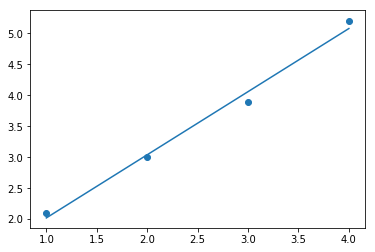

In [14]:
import pylab as plt
plt.scatter(x,y)
plt.plot(x,yf)
plt.show()

### Root finding routines ###

Define a function

In [15]:
def f(x):
  return 2*x*x - 10*x + 2 

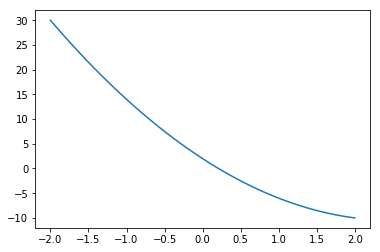

In [16]:
import pylab as plt
x = np.linspace(-2,2,50)
plt.plot(x,f(x))
plt.show()

Using the Newtown method to solve $f(x)=0$

In [17]:
from scipy.optimize import newton
x0 = 0
newton(f,x0)

0.20871215252207997

Using the Bissection method

In [18]:
from scipy.optimize import bisect  
xmin=-2
xmax=2
bisect(f,xmin,xmax)

0.20871215252373077

## Interpolation ##
Load module

In [19]:
from scipy import interpolate

In [20]:
help(interpolate.splrep)

Help on function splrep in module scipy.interpolate.fitpack:

splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)
    Find the B-spline representation of 1-D curve.
    
    Given the set of data points ``(x[i], y[i])`` determine a smooth spline
    approximation of degree k on the interval ``xb <= x <= xe``.
    
    Parameters
    ----------
    x, y : array_like
        The data points defining a curve y = f(x).
    w : array_like, optional
        Strictly positive rank-1 array of weights the same length as x and y.
        The weights are used in computing the weighted least-squares spline
        fit. If the errors in the y values have standard-deviation given by the
        vector d, then w should be 1/d. Default is ones(len(x)).
    xb, xe : float, optional
        The interval to fit.  If None, these default to x[0] and x[-1]
        respectively.
    k : int, optional
        The degree of the spline fit. It is recommended to use

Interpolate between points:

In [23]:
x = np.arange(10)
y = np.cos(x)

Create interpolator

In [24]:
ay = interpolate.splrep(x,y,s=1)

Interpolate

In [25]:
xi = np.arange(0,10,0.1)       
yi = interpolate.splev(xi,ay)

Plot:

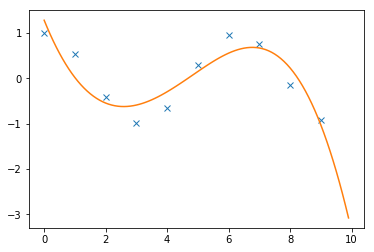

In [26]:
import pylab as plt
plt.plot(x,y,'x',xi,yi)
plt.show()